All the ***cmorized*** variables are stored under the directory:
```shell
data/
|-- 1pctco2
|   |-- Amon
|   |-- Lmon
|   `-- Omon
|-- 1pctco2bgc
|   |-- Amon
|   |-- Lmon
|   `-- Omon
|-- 1pctco2ctl
|   |-- Amon
|   |-- Lmon
|   |-- Omon
|   `-- fx
`-- 1pctco2rad
    |-- Amon
    |-- Lmon
    `-- Omon
```

In [ ]:
data_dir="/global/cfs/cdirs/m3522/1pctco2_temp/processed/data"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os, sys, glob
plt.rcParams['figure.figsize'] = [20, 10]


expnms=['rad', 'ctl', 'bgc', 'full']
colors=['r', 'k', 'g', 'b']

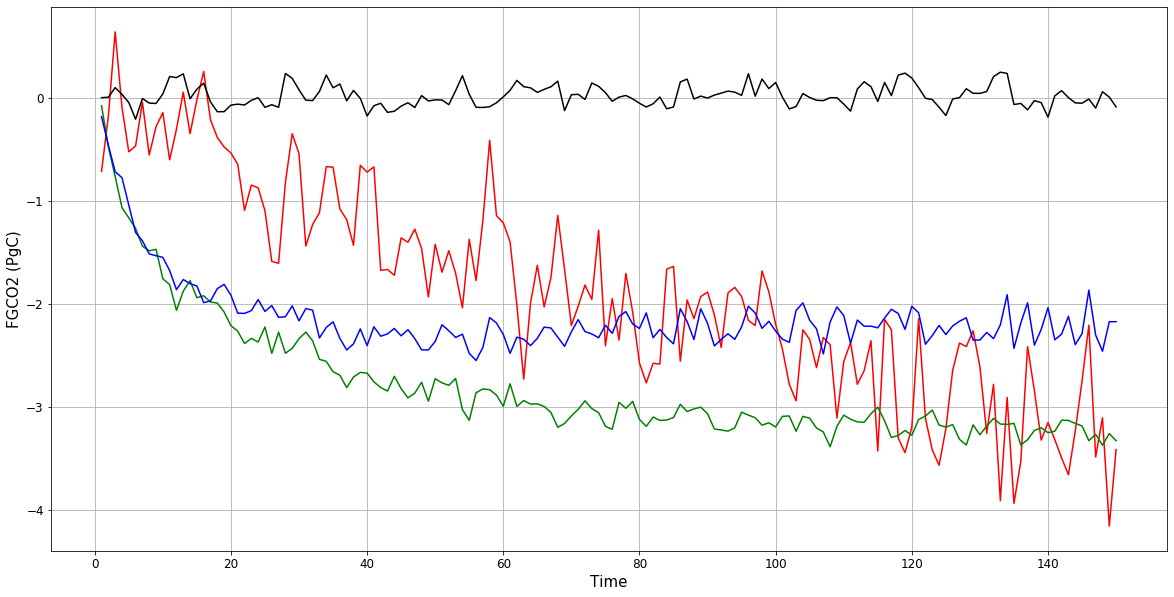

In [10]:

fgco2files=glob.glob("e3sm/*_fgco2_*")
fgco2files.sort(reverse=True)

x=np.linspace(1, 150, 150)
for ic, file in enumerate(fgco2files):
    with nc4.Dataset(file, 'r') as ncf:
        fgco2=ncf.variables['gs1as_fgco2'][0:150]*(-1.)
        
    plt.plot(x, fgco2, color=colors[ic])
plt.grid(); plt.xlabel('Time', fontsize=15); plt.ylabel('FGCO2 (PgC)', fontsize=15);plt.tick_params(axis='both', which='major', labelsize=12)
    

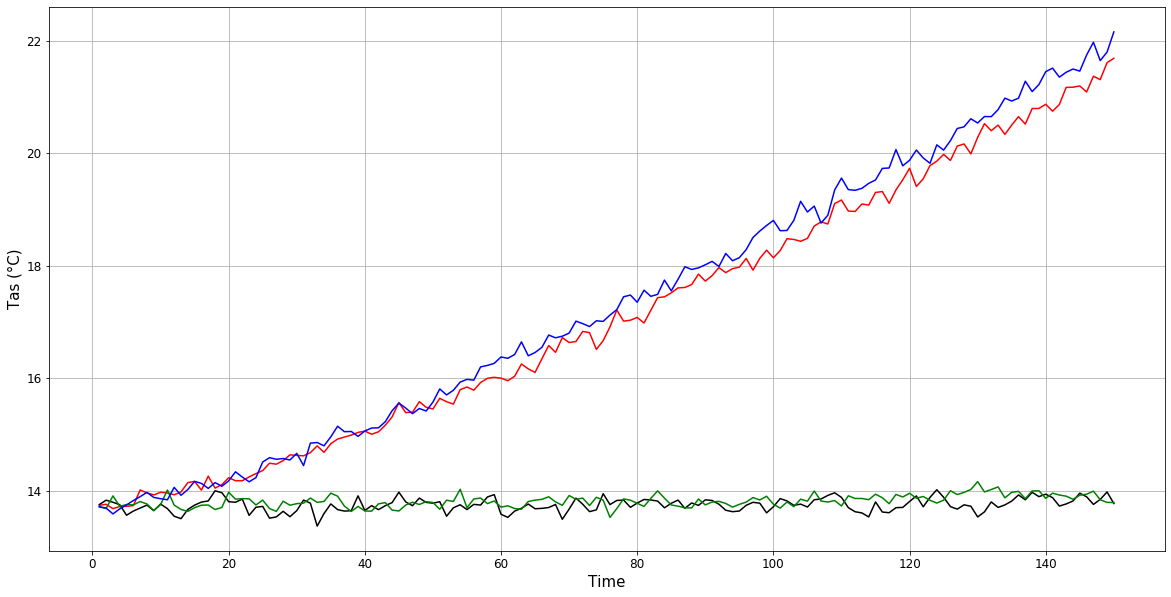

In [11]:

tasfiles=glob.glob("e3sm/*tas_*.nc")
tasfiles.sort(reverse=True)

x=np.linspace(1, 150, 150)
for ic, file in enumerate(tasfiles):
    with nc4.Dataset(file, 'r') as ncf:
        tas=ncf.variables['ga2aa_tas'][0:150]
        
    plt.plot(x, tas, color=colors[ic])

plt.grid(); plt.xlabel('Time', fontsize=15); plt.ylabel('Tas (\u00B0C)', fontsize=15);plt.tick_params(axis='both', which='major', labelsize=12)

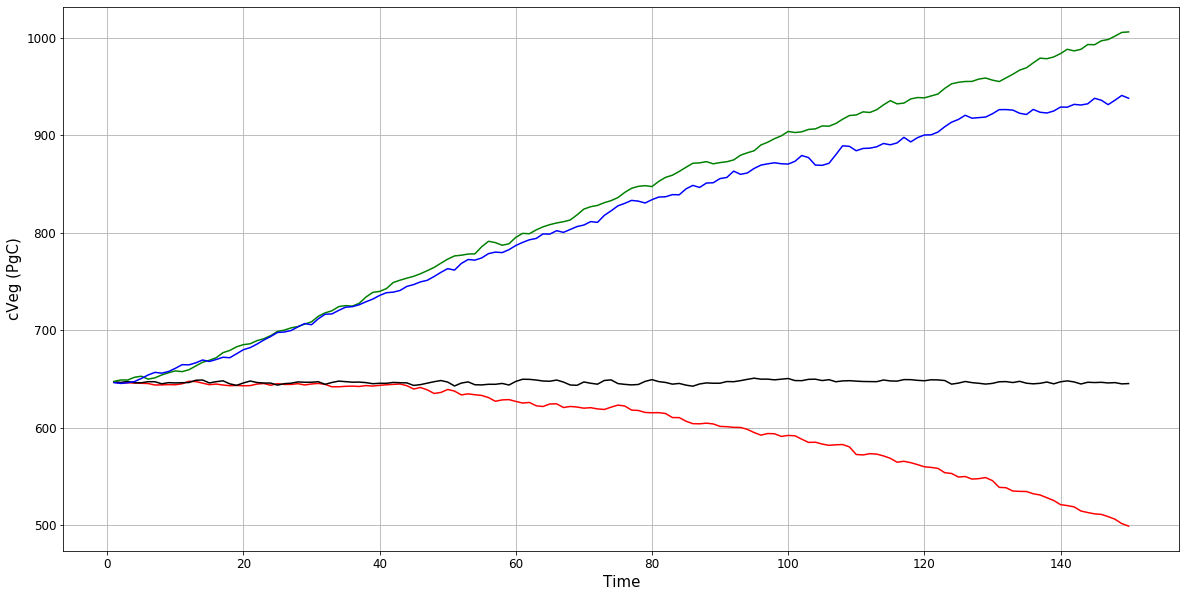

In [22]:
cVegfiles=glob.glob("e3sm/*cVeg_*.nc")
cVegfiles.sort(reverse=True)

x=np.linspace(1, 150, 150)
for ic, file in enumerate(cVegfiles):
    with nc4.Dataset(file, 'r') as ncf:
        cVeg=ncf.variables['gs1aa_cVeg'][0:150]
        
    plt.plot(x, cVeg, color=colors[ic])
plt.grid(); plt.xlabel('Time', fontsize=15); plt.ylabel('cVeg (PgC)', fontsize=15);plt.tick_params(axis='both', which='major', labelsize=12)

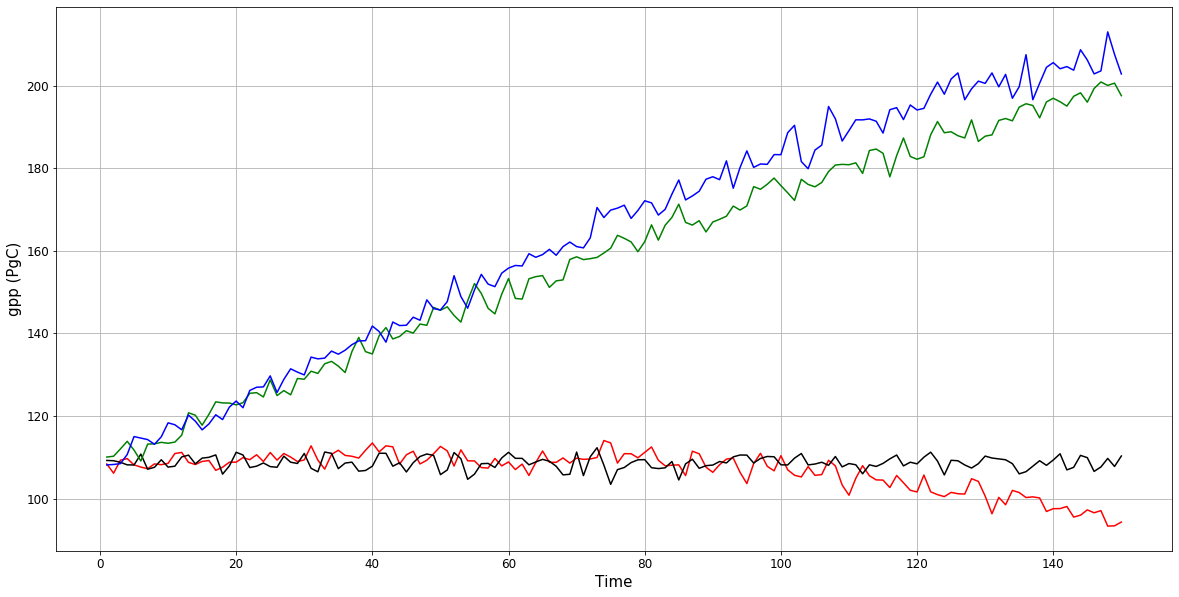

In [21]:
gppfiles=glob.glob("e3sm/*gpp_*.nc")
gppfiles.sort(reverse=True)

x=np.linspace(1, 150, 150)
for ic, file in enumerate(gppfiles):
    with nc4.Dataset(file, 'r') as ncf:
        gpp=ncf.variables['gs1as_gpp'][0:150]
        
    plt.plot(x, gpp, color=colors[ic])
plt.grid(); plt.xlabel('Time', fontsize=15); plt.ylabel('gpp (PgC)', fontsize=15);plt.tick_params(axis='both', which='major', labelsize=12)

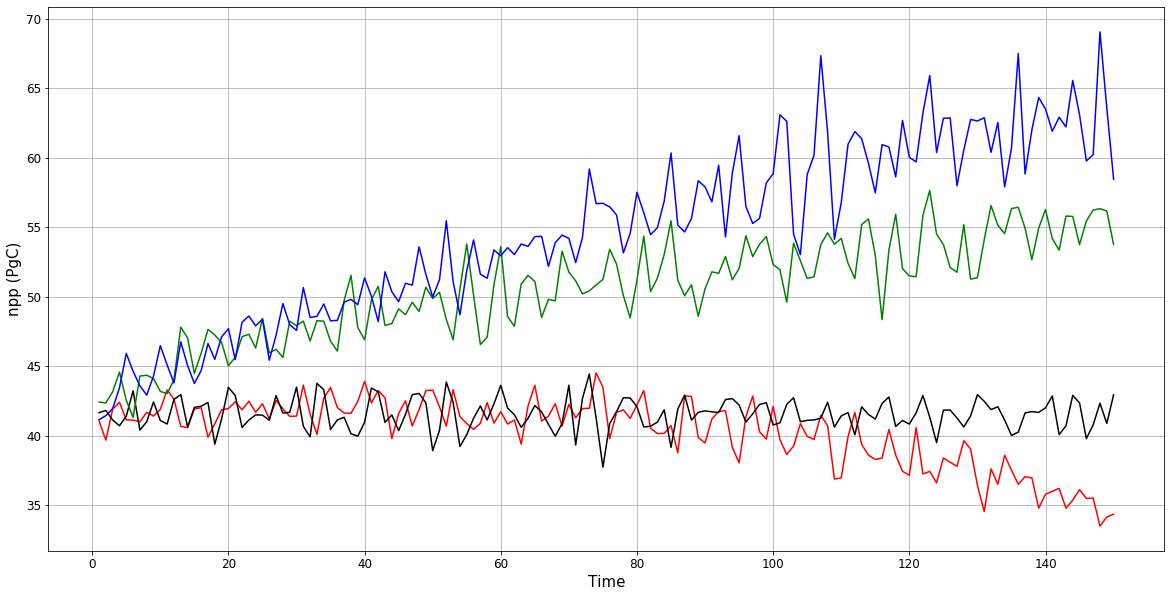

In [19]:
nppfiles=glob.glob("e3sm/*npp_*.nc")
nppfiles.sort(reverse=True)

x=np.linspace(1, 150, 150)
for ic, file in enumerate(nppfiles):
    with nc4.Dataset(file, 'r') as ncf:
        npp=ncf.variables['gs1as_npp'][0:150]
        
    plt.plot(x, npp, color=colors[ic])
plt.grid(); plt.xlabel('Time', fontsize=15); plt.ylabel('npp (PgC)', fontsize=15);plt.tick_params(axis='both', which='major', labelsize=12)

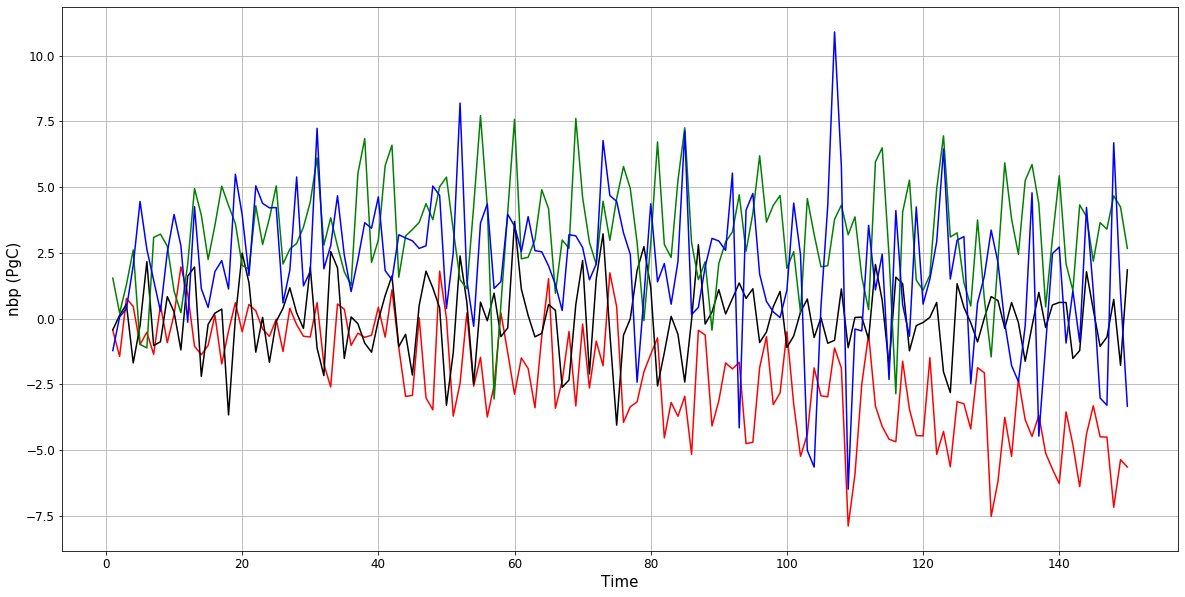

In [15]:
nbpfiles=glob.glob("e3sm/*nbp_*.nc")
nbpfiles.sort(reverse=True)

x=np.linspace(1, 150, 150)
for ic, file in enumerate(nbpfiles):
    with nc4.Dataset(file, 'r') as ncf:
        nbp=ncf.variables['gs1as_nbp'][0:150]
        
    plt.plot(x, nbp, color=colors[ic])
plt.grid(); plt.xlabel('Time', fontsize=15); plt.ylabel('nbp (PgC)', fontsize=15);plt.tick_params(axis='both', which='major', labelsize=12)

['e3sm/GBL_e3sm_gs1as_nbp_Lmon_e3sm_1pctco2rad_r1i1p1.nc', 'e3sm/GBL_e3sm_gs1as_nbp_Lmon_e3sm_1pctco2ctl_r1i1p1.nc', 'e3sm/GBL_e3sm_gs1as_nbp_Lmon_e3sm_1pctco2bgc_r1i1p1.nc', 'e3sm/GBL_e3sm_gs1as_nbp_Lmon_e3sm_1pctco2_r1i1p1.nc']
['e3sm/GBL_e3sm_gs1as_fgco2_Omon_e3sm_1pctco2rad_r1i1p1f1_gn.nc', 'e3sm/GBL_e3sm_gs1as_fgco2_Omon_e3sm_1pctco2ctl_r1i1p1f1_gr.nc', 'e3sm/GBL_e3sm_gs1as_fgco2_Omon_e3sm_1pctco2bgc_r1i1p1f1_gr.nc', 'e3sm/GBL_e3sm_gs1as_fgco2_Omon_e3sm_1pctco2_r1i1p1f1_gr.nc']


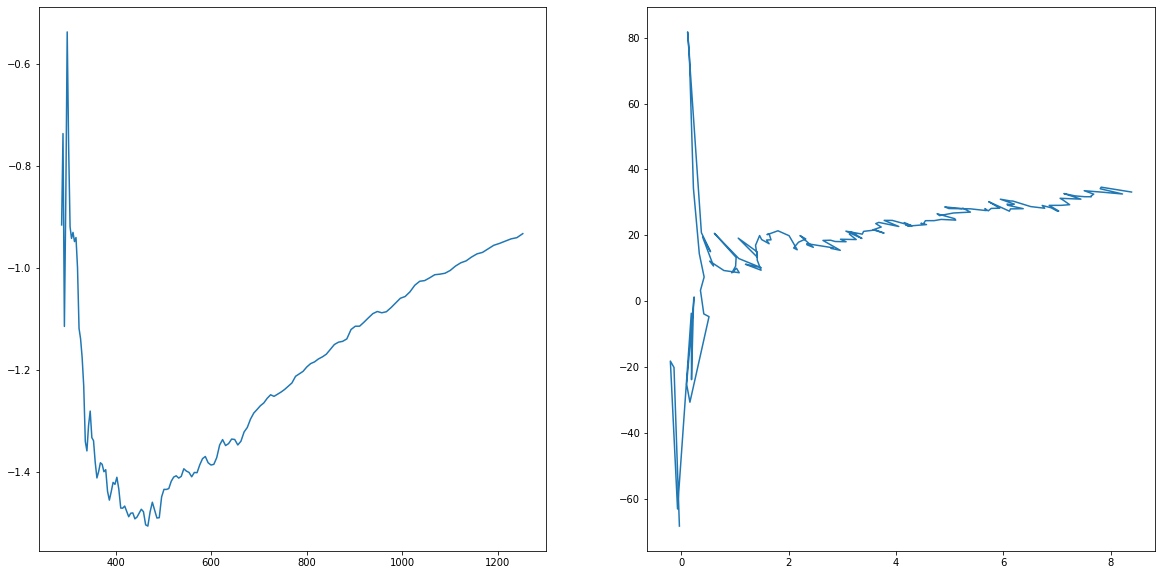

In [16]:
import glob


nbpfiles=glob.glob("e3sm/*nbp_*.nc")
nbpfiles.sort(reverse=True)

tasfiles=glob.glob("e3sm/*tas_*.nc")
tasfiles.sort(reverse=True)

fgco2files=glob.glob("e3sm/*fgco2*.nc")
fgco2files.sort(reverse=True)

print (nbpfiles)
print (fgco2files)

co2_1850 = 284.7  ## CESM used the CMIP5 rather than the CMIP6 value
co2_bgc_global_annual = co2_1850 * 1.01 ** np.arange(150)
co2_ful_global_annual = co2_1850 * 1.01 ** np.arange(150)
co2_ctl_global_annual = co2_1850 * 1.00 ** np.arange(150)
co2_rad_global_annual = co2_1850 * 1.00 ** np.arange(150)

delta_co2 = co2_bgc_global_annual - co2_ctl_global_annual[0:150]

tas_list=[]
atm_sink=[]
lnd_sink=[]
ocn_sink=[]

x=np.linspace(1, 150, 150)
for ic, file in enumerate(nbpfiles):
    with nc4.Dataset(file, 'r') as ncf1, \
         nc4.Dataset(fgco2files[ic],'r') as ncf2, \
         nc4.Dataset(tasfiles[ic], 'r') as ncf3:
        nbp = ncf1.variables['gs1as_nbp'][0:150]
        fgco2 = ncf2.variables['gs1as_fgco2'][0:150]
        tas_list.append(ncf3.variables['ga2aa_tas'][0:150])
        atm_sink.append(-(nbp+fgco2).cumsum())
        lnd_sink.append(nbp.cumsum())
        ocn_sink.append(fgco2.cumsum())
    #plt.plot(x, nbp, color=colors[ic])
delta_tas = tas_list[3] - tas_list[1]    
x = co2_bgc_global_annual

with nc4.Dataset("GHG_CMIP6_1pctCO2_c20180216.nc", 'r') as ncf:
    x=ncf.variables['CO2'][0:150]


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, (atm_sink[2]-atm_sink[1])/delta_co2)

x=delta_tas
ax2.plot(x, (atm_sink[3]-atm_sink[2])/delta_tas)

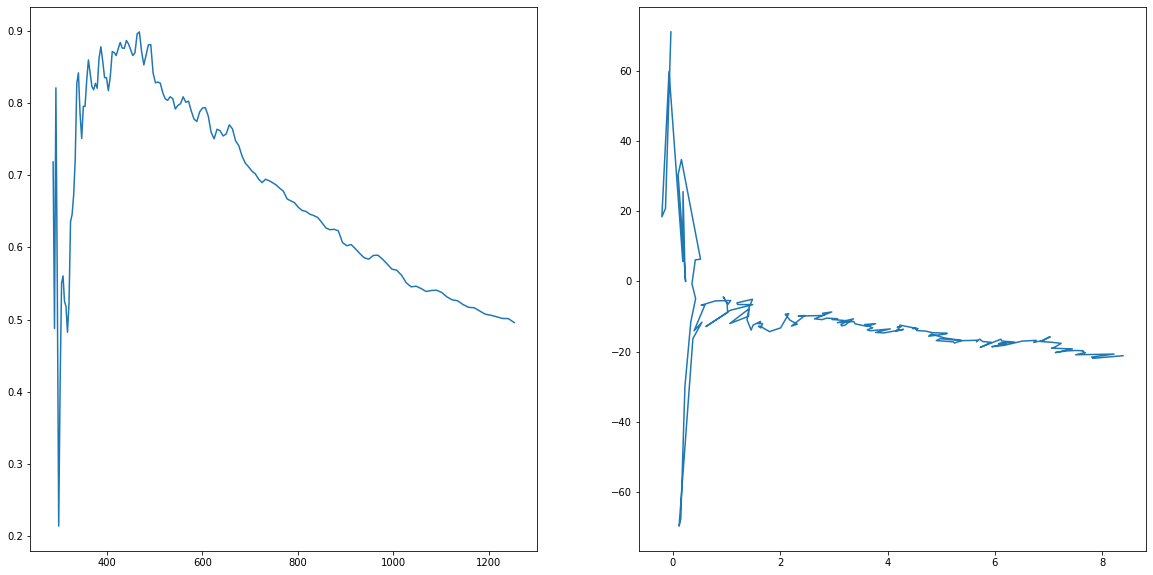

In [17]:

x = co2_bgc_global_annual
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, (lnd_sink[2]-lnd_sink[1])/delta_co2)

x=delta_tas
ax2.plot(x, (lnd_sink[3]-lnd_sink[2])/delta_tas)

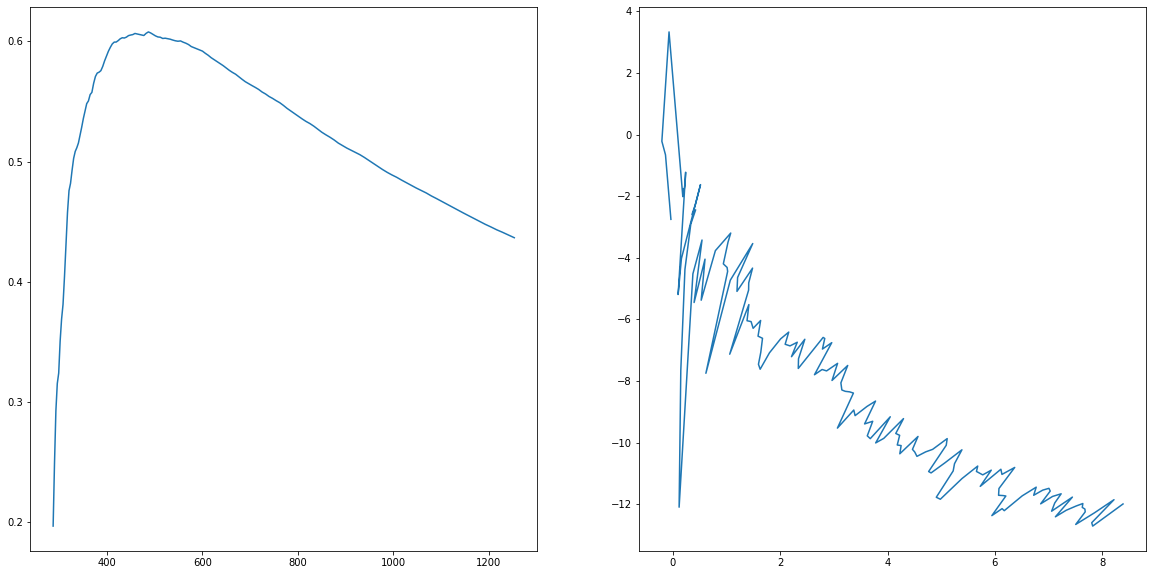

In [18]:
x = co2_bgc_global_annual
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, (ocn_sink[2]-ocn_sink[1])/delta_co2)

x=delta_tas
ax2.plot(x, (ocn_sink[3]-ocn_sink[2])/delta_tas)